In [ ]:
##IMAGE AND VIDEO ANALYTICS 
#SCENE CUT DETECTION

#N P Prerna 
#21MIA1035



In [ ]:
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [41]:
#Converting video into frames
def FrameCapture(path):
    vidObj = cv2.VideoCapture(path)
    count = 0

    while True:
        success, image = vidObj.read()
        if not success:
            print("No more frames to read or error occurred.")
            break

        cv2.imwrite(r"C:\Users\PRERNA\Desktop\iva2\FRAMES\frame%d.jpg" % count, image)
        print(f"Saved frame {count}")
        count += 1

    vidObj.release()

if __name__ == '__main__': 
    FrameCapture(r"C:\Users\PRERNA\Downloads\5482280-hd_1080_1920_25fps.mp4")



Saved frame 0
Saved frame 1
Saved frame 2
Saved frame 3
Saved frame 4
Saved frame 5
Saved frame 6
Saved frame 7
Saved frame 8
Saved frame 9
Saved frame 10
Saved frame 11
Saved frame 12
Saved frame 13
Saved frame 14
Saved frame 15
Saved frame 16
Saved frame 17
Saved frame 18
Saved frame 19
Saved frame 20
Saved frame 21
Saved frame 22
Saved frame 23
Saved frame 24
Saved frame 25
Saved frame 26
Saved frame 27
Saved frame 28
Saved frame 29
Saved frame 30
Saved frame 31
Saved frame 32
Saved frame 33
Saved frame 34
Saved frame 35
Saved frame 36
Saved frame 37
Saved frame 38
Saved frame 39
Saved frame 40
Saved frame 41
Saved frame 42
Saved frame 43
Saved frame 44
Saved frame 45
Saved frame 46
Saved frame 47
Saved frame 48
Saved frame 49
Saved frame 50
Saved frame 51
Saved frame 52
Saved frame 53
Saved frame 54
Saved frame 55
Saved frame 56
Saved frame 57
Saved frame 58
Saved frame 59
Saved frame 60
Saved frame 61
Saved frame 62
Saved frame 63
Saved frame 64
Saved frame 65
Saved frame 66
Saved

In [76]:
#Converting frames into HSV color mode

path = Path(r"C:\Users\PRERNA\Desktop\IVA_9\FRAMES")
frames = list(path.glob("*.jpg"))
frames.sort(key=lambda x: int(x.stem.split('frame')[-1]))

count = 0
for imagepath in frames:
    img = cv2.imread(str(imagepath))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    count += 1
    cv2.imwrite(r"C:\Users\PRERNA\Desktop\IVA_9\HSV_FRAMES\hsv%d.jpg" % count, img)

print("Converted to HSV")


Converted to HSV


In [155]:
#Colour Thresholding for image segmentation

def colour_thresholding(image_path):
    image = cv2.imread(image_path)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_bound = np.array([40, 40, 0])  
    upper_bound = np.array([100, 255, 255])  
    mask = cv2.inRange(hsv_image, lower_bound, upper_bound)
    return mask, image


path = Path(r"C:\Users\PRERNA\Desktop\IVA_9\FRAMES")
frames = list(path.glob("*.jpg"))
frames.sort(key=lambda x: int(x.stem.split('frame')[-1]))

count = 0
for imagepath in frames:
    img = cv2.imread(str(imagepath))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    count += 1
    mask, original_image = colour_thresholding(str(imagepath))
    segmented_image = cv2.bitwise_and(original_image, original_image, mask=mask)
    cv2.imwrite(r"C:\Users\PRERNA\Desktop\IVA_9\Masked_frames\mask%d.jpg" % count, mask)
   

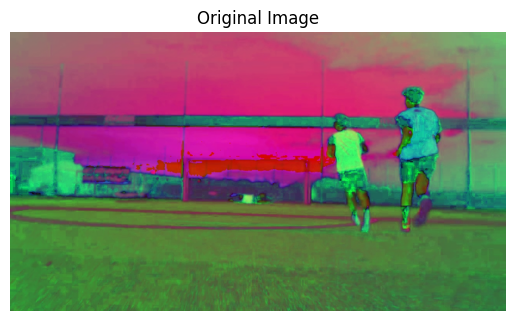

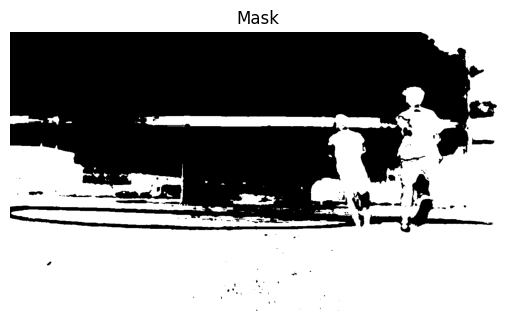

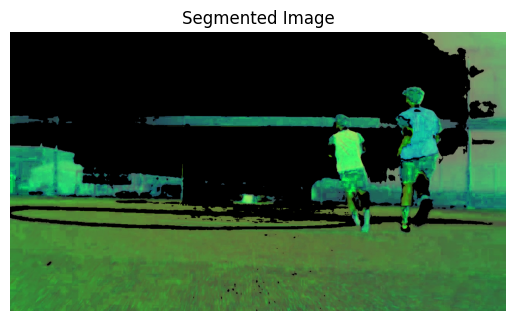

In [154]:
#Sample output after colour thresholding

image_path = r"C:\Users\PRERNA\Desktop\IVA_9\HSV_FRAMES\hsv109.jpg"  
image = cv2.imread(image_path)

# Display the original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range for the color (e.g., green)
lower_bound = np.array([40, 40, 0])  # Adjust these values as needed
upper_bound = np.array([100, 255, 255])  # Adjust these values as needed

# Create a mask using the defined color ranges
mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

# Display the mask
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis('off')
plt.show()

# Use the mask to extract the colored region
segmented_image = cv2.bitwise_and(image, image, mask=mask)

# Display the segmented output
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title("Segmented Image")
plt.axis('off')
plt.show()


In [158]:
#Computing histogram difference for scene-cut detection

def calculate_frame_difference(frame1, frame2):
    diff = cv2.absdiff(frame1, frame2)
    diff_gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(diff_gray, 30, 255, cv2.THRESH_BINARY)
    return thresh

def calculate_histogram_difference(frame1, frame2):
    hist1 = cv2.calcHist([frame1], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist2 = cv2.calcHist([frame2], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist1, hist1)
    cv2.normalize(hist2, hist2)
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

208792
hist_diff: 0.9896794936567057
200084
hist_diff: 0.9999929477100419
44083
hist_diff: 0.9999482649352066
54459
hist_diff: 0.9991781238678268
46777
hist_diff: 0.9996078725773816
48968
hist_diff: 0.9999167162251067
43712
hist_diff: 0.9999989392110181
42212
hist_diff: 0.9998826733813457
30667
hist_diff: 0.9999830711771891
47322
hist_diff: 0.9993988710006151
51213
hist_diff: 0.9999926808942265
202049
hist_diff: 0.9991913321501895
193313
hist_diff: 0.9981809545796956
40273
hist_diff: 0.999678066923521
46527
hist_diff: 0.9996724911732207
43932
hist_diff: 0.9997804356115705
41709
hist_diff: 0.9999275955796991
33774
hist_diff: 0.9998764450083386
20281
hist_diff: 0.9999932654917215
38313
hist_diff: 0.9999332977935401
33361
hist_diff: 0.9998896420019653
23158
hist_diff: 0.9999660165489137
209489
hist_diff: 0.9999976000678519
210646
hist_diff: 0.9999975500363176
209397
hist_diff: 0.9998435062032568
103573
hist_diff: 0.9999452888977715
97413
hist_diff: 0.9998625172752322
101396
hist_diff: 0.9

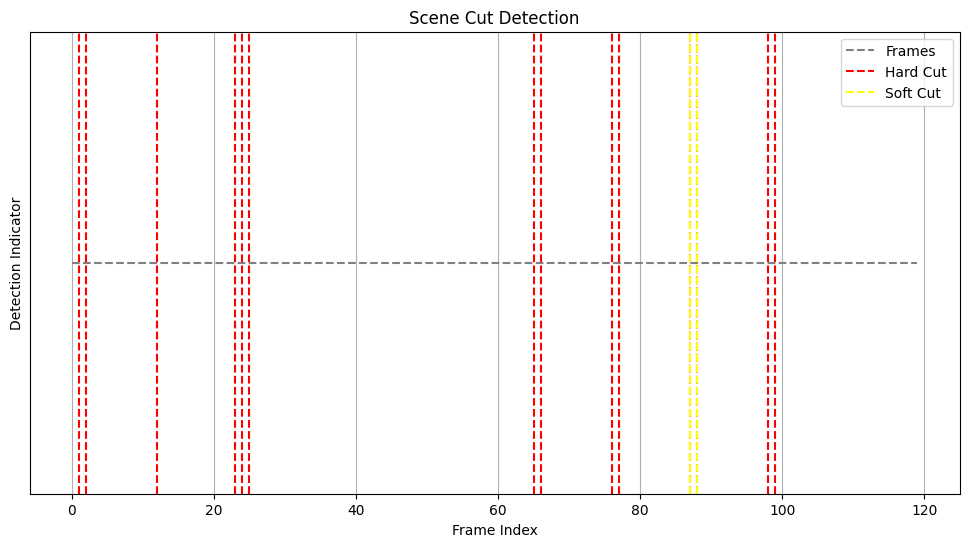

In [165]:
#Finding Hard cuts and Soft cuts

frame_path = Path(r"C:\Users\PRERNA\Desktop\IVA_9\Masked_frames")
frames = list(frame_path.glob("*.jpg"))

hard_cut_threshold = 200000  
soft_cut_threshold = 0.899

hard_cuts = []
soft_cuts = []

for i in range(1, len(frames)):
    frame1 = cv2.imread(str(frames[i - 1]))
    frame2 = cv2.imread(str(frames[i]))

    diff_mask = calculate_frame_difference(frame1, frame2)
    non_zero_count = np.count_nonzero(diff_mask)

    hist_diff = calculate_histogram_difference(frame1, frame2)
    print(non_zero_count)
    if non_zero_count > hard_cut_threshold:
        hard_cuts.append(i)
    print("hist_diff:",hist_diff)
    if hist_diff < soft_cut_threshold:
        soft_cuts.append(i)


print("Detected Cuts:")
print("=================")
print(f"Hard cuts detected at frames: {hard_cuts}")
print(f"Soft cuts detected at frames: {soft_cuts}")


plt.figure(figsize=(12, 6))
plt.plot(range(len(frames)), np.zeros(len(frames)), color='gray', label='Frames', linestyle='--')

# Mark hard cuts
for hc in hard_cuts:
    plt.axvline(x=hc, color='red', linestyle='--', label='Hard Cut' if hc == hard_cuts[0] else "")

# Mark soft cuts
for sc in soft_cuts:
    plt.axvline(x=sc, color='yellow', linestyle='--', label='Soft Cut' if sc == soft_cuts[0] else "")

plt.title('Scene Cut Detection')
plt.xlabel('Frame Index')
plt.ylabel('Detection Indicator')
plt.yticks([])
plt.legend()
plt.grid()
plt.show()

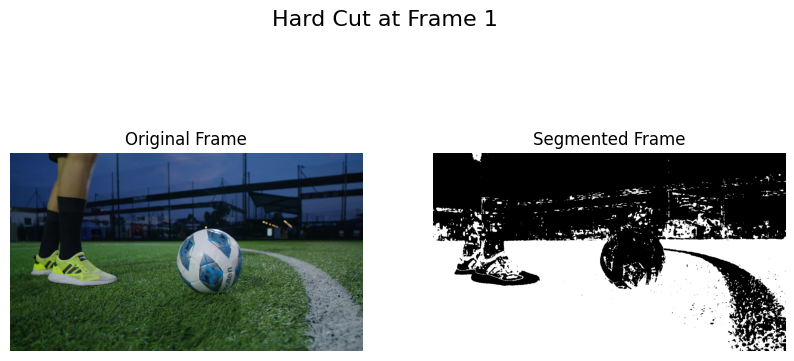

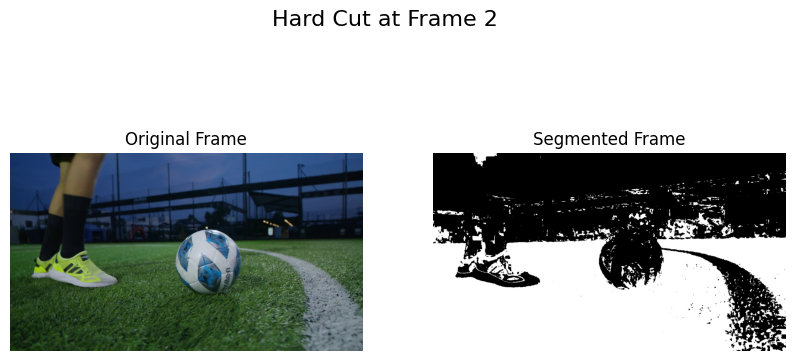

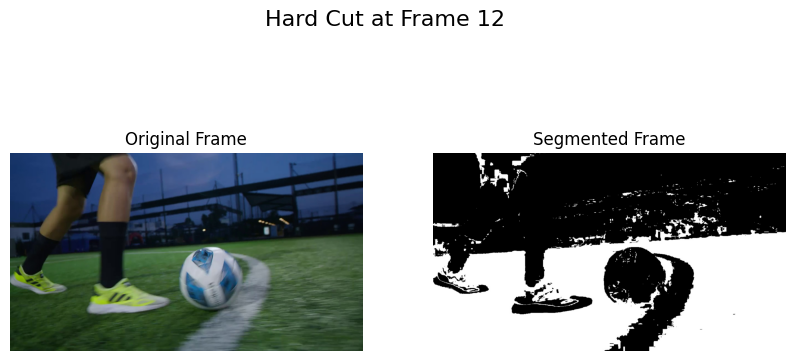

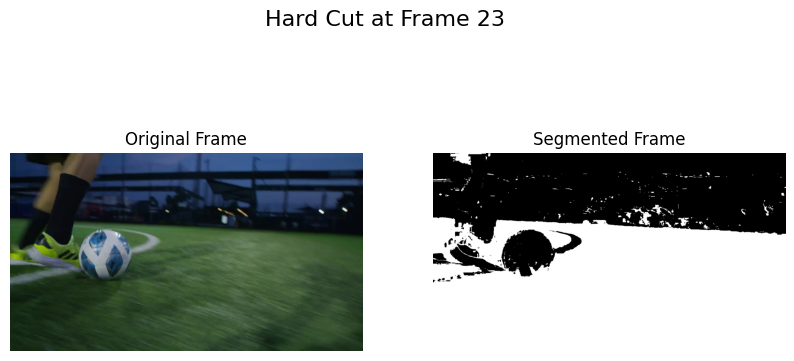

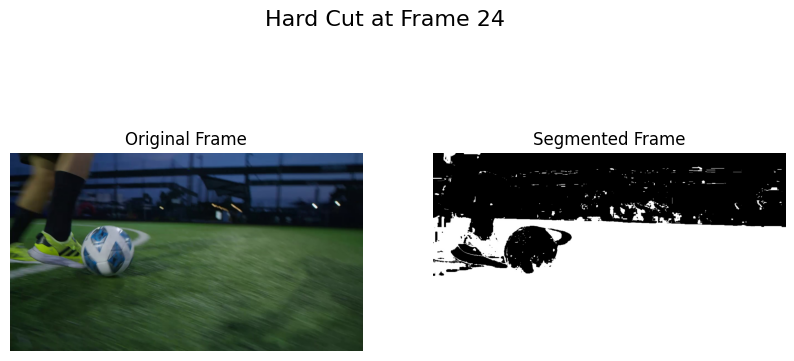

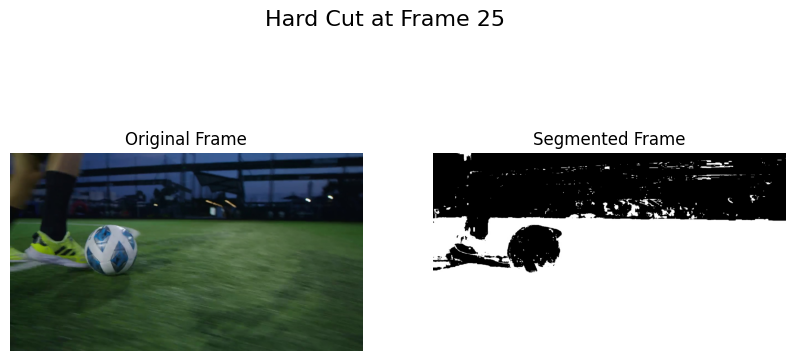

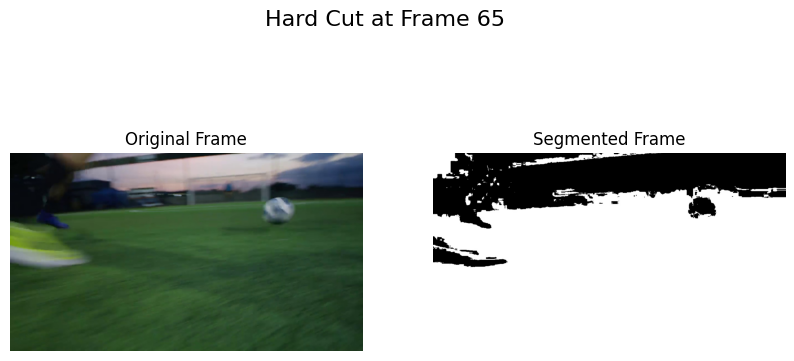

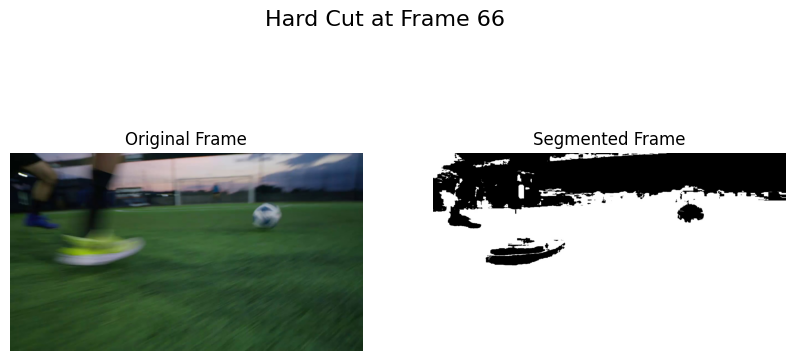

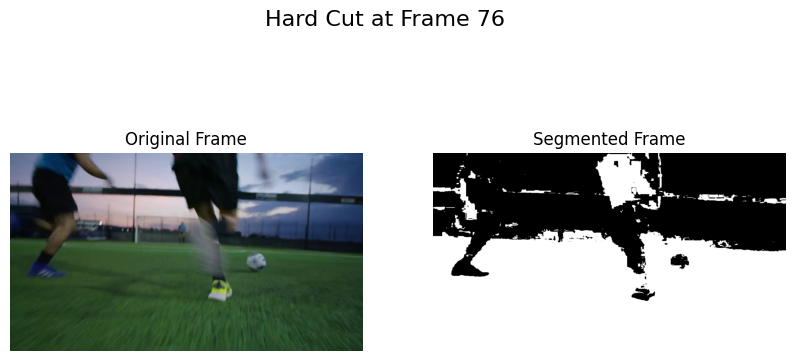

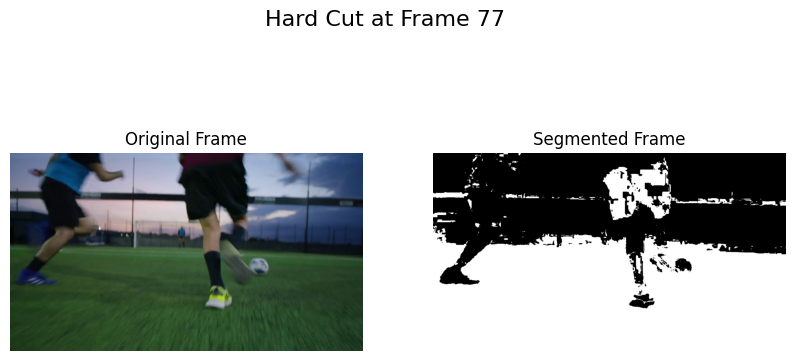

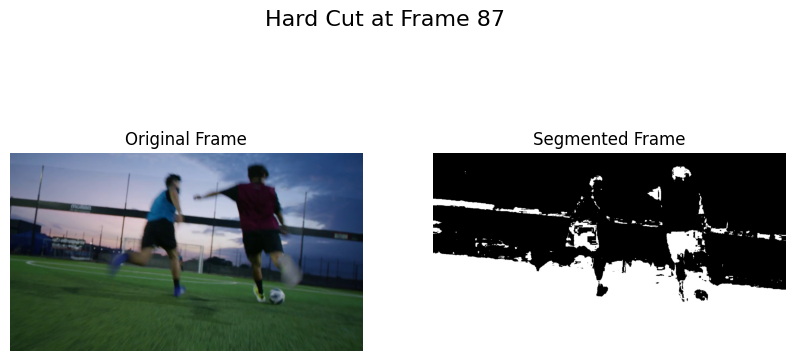

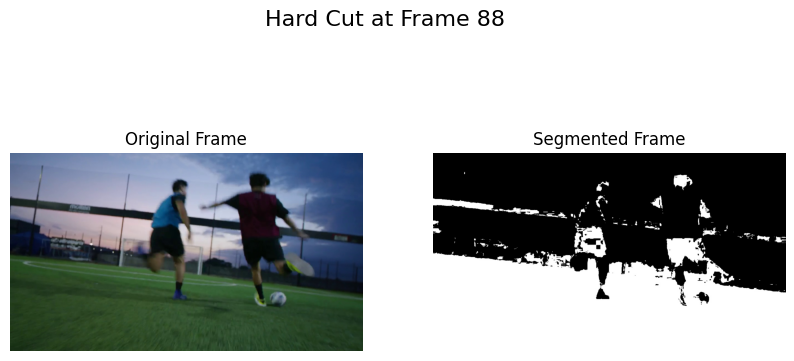

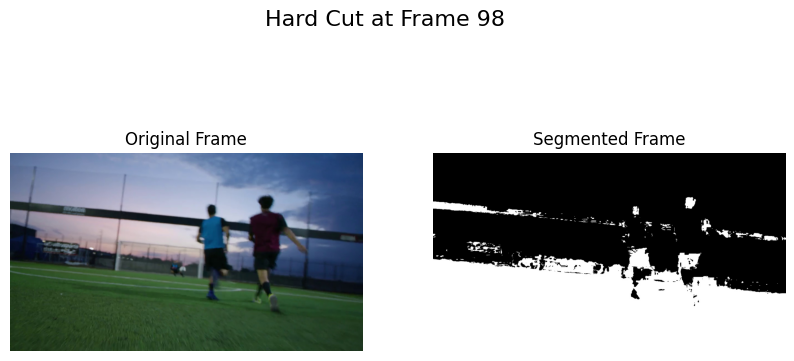

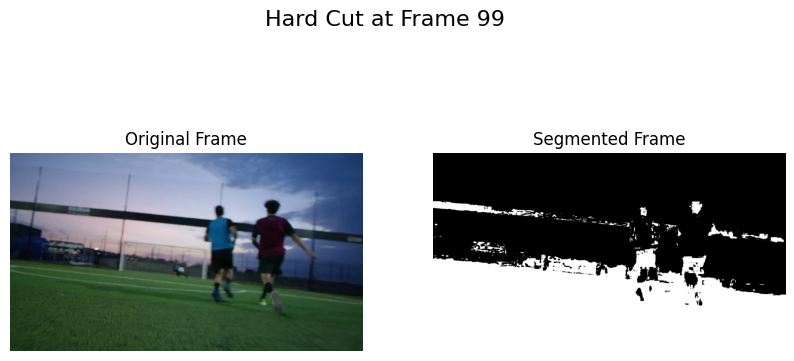

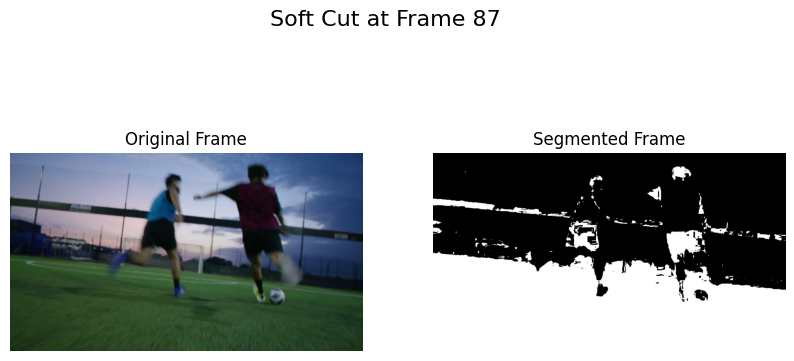

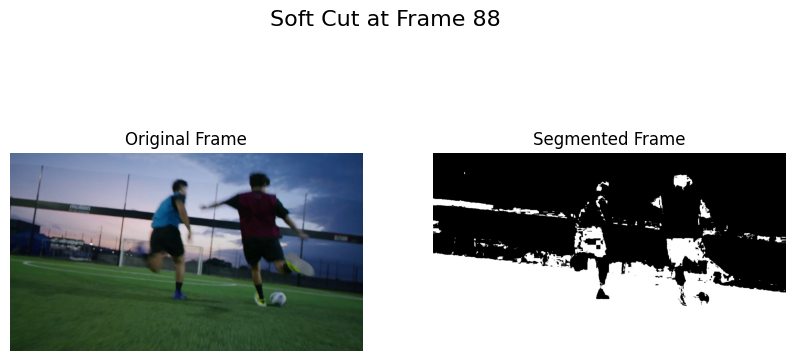

In [166]:
#Displaying hard cut and soft cut frames and their segmented versions

original_frame_path = Path(r"C:\Users\PRERNA\Desktop\IVA_9\FRAMES")
segmented_frame_path = Path(r"C:\Users\PRERNA\Desktop\IVA_9\Masked_frames")

original_frames = list(original_frame_path.glob("*.jpg"))
segmented_frames = list(segmented_frame_path.glob("*.jpg"))

original_frames.sort(key=lambda x: int(x.stem.split('frame')[-1]))  # Assumes 'frame' in filename like 'frame1.jpg'
segmented_frames.sort(key=lambda x: int(x.stem.split('mask')[-1]))  # Assumes 'maskedimage' in filename

def show_detected_cuts(cuts, original_frames, segmented_frames, title):
    for cut in cuts:
        # Ensure the index corresponds to the frame number
        original_frame = cv2.imread(str(original_frames[cut]))  # Get original frame from original folder
        segmented_frame = cv2.imread(str(segmented_frames[cut]))  # Get segmented frame from masked folder

        plt.figure(figsize=(10, 5))
        plt.suptitle(f"{title} at Frame {cut}", fontsize=16)

        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(original_frame, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
        plt.title("Original Frame")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(segmented_frame, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
        plt.title("Segmented Frame")
        plt.axis('off')

        plt.show()

show_detected_cuts(hard_cuts, original_frames, segmented_frames, "Hard Cut")

show_detected_cuts(soft_cuts, original_frames, segmented_frames, "Soft Cut")
